#### A study based on the Stack Overflow Annual Developer Survey for 2022.

#### Business Understanding
* Brief Description: 
The 2022 Stack Overflow Annual Developer Survey has over 70,000 responses collected from more than 180 countries. I performed data analysis of the survey responses to look into how the country of residence can affect salary and working conditions, and what programming language preferences are recorded in relation to years of professional experience. In specific the aim of this analysis is to answer the following 3 questions:
    - Question 1. Which programming languages are used by the most experienced developers?
    - Question 2. How does the country of residence relate to salary and years of professional experience?
    - Question 3. How flexible are the working conditions in the different countries?
    
The findings of this data analysis are presented in this blog post:
https://medium.com/@irene.kolaiti/its-where-you-live-not-what-you-know-5ed4b8c62ec3

#### Data Understanding
* Access  
I downloaded from https://insights.stackoverflow.com/survey the following files that contain the data from the 2022 survey. The explanation of the files is copied over from the README_2022 file that in included in the 2022 folder:
1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name

In other words, the survey_results_public.csv contains the raw data and the survey_results_schema.csv contains an explanation of the survey questions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

schema_2022 = pd.read_csv('./survey_results_schema_2022.csv')
df_2022 = pd.read_csv('./survey_results_public_2022.csv')
df_2022.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [2]:
num_rows = df_2022.shape[0] #Check the number of rows in the dataset
num_cols = df_2022.shape[1] #Check the number of columns in the dataset

print(num_rows)
print(num_cols)

73268
79


In [3]:
df_2022.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

#### Q1 - Which programming languages are used by the most experienced developers?

#### Data Understanding
* Explore  
In the following cells I use the get_description function to explore what type of questions each column of the dataset corresponds to. I also look into the range of values of these columns.

In [4]:
def get_description(column_name, schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = schema.loc[schema['qname'] == column_name, 'question'].tolist()
    return desc

In [5]:
# Check the survey question about language
get_description('Language', schema_2022)

['Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)']

In [6]:
# Check the survey question about YearsCode
get_description('YearsCode', schema_2022)

['Including any education, how many years have you been coding in total?']

In [7]:
# Check the survey question about YearsCodePro
get_description('YearsCodePro', schema_2022)

['NOT including education, how many years have you coded professionally (as a part of your work)?']

In [8]:
# Check if there are any other questions about Years
schema_2022[schema_2022['qname'].str.contains('Years',regex=False)]

,qid,qname,question,force_resp,type,selector
12,QID32,YearsCode,"Including any education, how many years have y...",False,MC,DL
13,QID34,YearsCodePro,"NOT including education, how many years have y...",False,MC,DL


In [9]:
# Check if there are any other questions about Language
schema_2022[schema_2022['qname'].str.contains('Language',regex=False)]

,qid,qname,question,force_resp,type,selector
23,QID233,Language,"Which <b>programming, scripting, and markup la...",False,Matrix,Likert


In [10]:
# Get an idea about the values of the LanguageHaveWorkedWith column 
language_vals = df_2022['LanguageHaveWorkedWith'].value_counts()
language_vals

HTML/CSS;JavaScript;TypeScript                                                              1250
Python                                                                                       962
HTML/CSS;JavaScript                                                                          914
HTML/CSS;JavaScript;PHP;SQL                                                                  745
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                        570
                                                                                            ... 
C#;Java;JavaScript;PHP;PowerShell;SQL;TypeScript                                               1
C++;HTML/CSS;JavaScript;Python;Solidity;SQL                                                    1
Dart;Haskell;HTML/CSS;Java;R;SQL;TypeScript                                                    1
Bash/Shell;C;C#;Go;HTML/CSS;Java;JavaScript;Lua;Perl;PHP;Python;Ruby;Rust;SQL;TypeScript       1
C#;JavaScript;Lua;PowerShell;S

#### Prepare Data
* Wrangle and Clean  
Looking into the values of the LanguageHaveWorkedWith column we can see that these are separated by a ';' and that more that one answers are included for each response. In the following cells I declare and use the clean_and_plot function in order to separate the responses and count how often each programming language is used. 

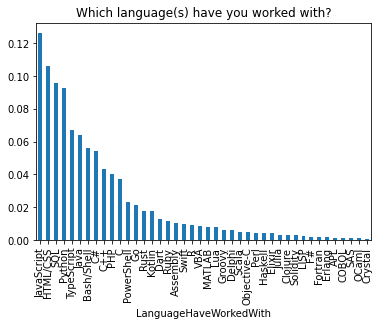

In [11]:
# The LanguageHaveWorkedWith column has values that need to be separated
# The clean_and_plot function will do that and provide a percent for each language option
# I got some help from here: https://www.pauldesalvo.com/how-to-break-up-a-comma-separated-string-in-a-pandas-column/

def clean_and_plot(df, col, title, plot):
    '''
    INPUT 
        df - a dataframe holding a column that needs cleaning
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the given column.
    '''
    
    # Get the combinations of the column values 
    possible_vals = df[col].str.split(';', expand=False)
    # Find a list with the distinct values from the combinations
    vals_list = possible_vals.explode().unique()
    # Get a list of all the distinct values in the column
    unique_vals = [val.strip() for sublist in df[col].dropna().str.split(";").tolist() for val in sublist]
    # Get a count of each distinct value
    column_summary = pd.DataFrame(unique_vals,columns=[col]).value_counts().reset_index().rename(columns={0:'count'})
    # Set the column as index to the dataframe
    column_summary.set_index(col, inplace=True)
    
    #print("SUM", column_summary.sum())
    
    if plot:
        (column_summary/column_summary.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    column_summary_perc = column_summary/column_summary.sum()
    return column_summary_perc
    
props_df = clean_and_plot(df_2022, 'LanguageHaveWorkedWith', 'Which language(s) have you worked with?', True)

In [12]:
# Check out the values of the YearsCodePro column
df_2022['YearsCodePro'].value_counts()

3                     4261
5                     4057
2                     3945
4                     3884
10                    3333
6                     3184
7                     2760
8                     2646
1                     2644
Less than 1 year      1972
15                    1822
12                    1711
9                     1583
20                    1472
11                    1369
14                    1048
22                     933
16                     921
13                     914
25                     877
18                     787
17                     723
30                     568
23                     463
24                     454
21                     429
19                     380
26                     320
27                     286
35                     266
28                     254
32                     223
40                     175
29                     126
33                     122
31                     121
34                     113
3

In [22]:
# Convert string values to numeric
df_2022_yrs = df_2022[['ResponseId','YearsCodePro','Employment','RemoteWork', 'LanguageHaveWorkedWith']]
df_2022_yrs['YearsCodePro'] = df_2022_yrs['YearsCodePro'].replace('Less than 1 year', 0)
df_2022_yrs['YearsCodePro'] = df_2022_yrs['YearsCodePro'].replace('More than 50 years', 51)
df_2022_yrs['YearsCodePro'].value_counts()

/var/folders/pz/h6v6tlgx0h55sh0774vn5c4c0000gp/T/ipykernel_19954/3086768438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_yrs['YearsCodePro'] = df_2022_yrs['YearsCodePro'].replace('Less than 1 year', 0)
/var/folders/pz/h6v6tlgx0h55sh0774vn5c4c0000gp/T/ipykernel_19954/3086768438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_yrs['YearsCodePro'] = df_2022_yrs['YearsCodePro'].replace('More than 50 years', 51)


3     4261
5     4057
2     3945
4     3884
10    3333
6     3184
7     2760
8     2646
1     2644
0     1972
15    1822
12    1711
9     1583
20    1472
11    1369
14    1048
22     933
16     921
13     914
25     877
18     787
17     723
30     568
23     463
24     454
21     429
19     380
26     320
27     286
35     266
28     254
32     223
40     175
29     126
33     122
31     121
34     113
36     111
37     100
38      96
42      67
45      52
39      51
41      42
51      41
43      31
44      26
46      19
48      18
50      14
47      10
49       9
Name: YearsCodePro, dtype: int64

#### Prepare Data
* Wrangle and Clean  
In the following cells I handle null/NaN values and I ensure that they are of the same data type.

In [23]:
# Check if there are null values
df_2022_yrs['YearsCodePro'].isnull().sum()

21435

In [24]:
# Remove rows with null values for YearsCodePro
df_2022_yrs = df_2022_yrs.dropna(subset=['YearsCodePro'], axis=0)
df_2022_yrs['YearsCodePro'].isnull().sum()

0

In [25]:
# Convert all YearsCodePro values to int
df_2022_yrs = df_2022_yrs.astype({'YearsCodePro':'int'})

#### Question 1 - Which programming languages are used by the most experienced developers?
* Analyse  
Here I separate the data into 2 categories: 'less than 15' and '15 and over' years of professional experience. I create another column that has the category for each row of the dataset and then I split the dataset in two subsets. For each of the subsets I calculate the percentage that each programming language has in the responses. After that I merge the two subsets and calculate the difference of the percentage between the two categories for every programming language. 
* Visualise  
Then I present the findings in a table that has the programming languages, the percentage of each group for every programming language and the difference between the two groups. 
* Explain the visualisation  
The difference between the two groups is visualised by using colours. The colours are used to highlight the preferences between the two groups: 
    - The blue colour is used to highlight that the 'less than 15' years group has a higher percentage. 
    - The orange colour is used to highlight that the '15 and over' years group has a higher percentage.  
    - The length of the colour bar is used to signify how big the difference is between the percentages of the two groups. For example, we can see that Bash/Shell, SQL, Delphi and C# are more popular with the ‘15 and over’ developers, while the ‘less than 15’ years group shows preference for Python, HTML/CSS and JavaScript.

In [26]:
cut_labels = ['less than 15', '15 and over']
cut_bins = [0, 15, 60]
df_2022_yrs['Bin_YearsCodePro'] = pd.cut(df_2022_yrs['YearsCodePro'], bins=cut_bins, labels=cut_labels, include_lowest = True)
df_2022_yrs.head()

,ResponseId,YearsCodePro,Employment,RemoteWork,LanguageHaveWorkedWith,Bin_YearsCodePro
2,3,5,"Employed, full-time","Hybrid (some remote, some in-person)",C#;C++;HTML/CSS;JavaScript;Python,less than 15
3,4,17,"Employed, full-time",Fully remote,C#;JavaScript;SQL;TypeScript,15 and over
4,5,3,"Employed, full-time","Hybrid (some remote, some in-person)",C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,less than 15
8,9,6,"Employed, full-time","Hybrid (some remote, some in-person)",NaN,less than 15
9,10,30,"Independent contractor, freelancer, or self-em...",Fully remote,Delphi;Java;Swift,15 and over


In [27]:
# Check that there are no NaN values
df_2022_yrs['Bin_YearsCodePro'].isnull().sum()

0

In [28]:
yrs_1 = df_2022_yrs[df_2022_yrs['Bin_YearsCodePro'] == '15 and over'] # Subset df to only those with YearsCodePro [less than a year-15)
yrs_0 = df_2022_yrs[df_2022_yrs['Bin_YearsCodePro'] == 'less than 15'] # Subset df to only those with YearsCodePro [15-over 50)

In [29]:
yrs_15_and_over = clean_and_plot(yrs_1, 'LanguageHaveWorkedWith', 'Which language(s) have you worked with?', False)
yrs_less_than_15 = clean_and_plot(yrs_0, 'LanguageHaveWorkedWith', 'Which language(s) have you worked with?', False)

comp_df = pd.merge(yrs_15_and_over, yrs_less_than_15, left_index=True, right_index=True)
comp_df.columns = ['yrs_15_and_over', 'yrs_less_than_15']
comp_df['Diff_YearsCode_Vals'] = comp_df['yrs_15_and_over'] - comp_df['yrs_less_than_15']
comp_df.style.bar(subset=['Diff_YearsCode_Vals'], align='mid', color=['#89CFF0', '#FFA500'])

,yrs_15_and_over,yrs_less_than_15,Diff_YearsCode_Vals
LanguageHaveWorkedWith,,,
JavaScript,0.115357,0.135277,-0.019920
SQL,0.113497,0.102637,0.010860
HTML/CSS,0.091863,0.109088,-0.017225
Python,0.070536,0.088866,-0.018330
C#,0.068225,0.054853,0.013372
Bash/Shell,0.067936,0.057372,0.010564
TypeScript,0.056288,0.080711,-0.024423
Java,0.055006,0.062894,-0.007888
PHP,0.038916,0.042163,-0.003248


#### Q2 - How does the country of residence relates to salary and years of experience?

#### Data Understanding
* Access and Explore  
Here I look into the questions that are related with programming languages used, yearly salary and years of experience. I have a quick look at stats that I can get using pandas.

In [30]:
# Check the survey questions that are related to 'total compensation'
schema_2022[schema_2022['qname'].str.contains('Comp',regex=False)]

,qid,qname,question,force_resp,type,selector
20,QID51,CompTotal,What is your current total compensation (salar...,False,TE,SL
21,QID52,CompFreq,"Is that compensation weekly, monthly, or yearly?",False,MC,MAVR


In [31]:
get_description('CompTotal', schema_2022)

['What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.']

In [32]:
get_description('CompFreq', schema_2022)

['Is that compensation weekly, monthly, or yearly?']

In [33]:
get_description('ConvertedCompYearly', schema_2022)

[]

In [34]:
# Check the values of ConvertedCompYearly
df_2022['ConvertedCompYearly'].value_counts()

150000.0    393
200000.0    362
120000.0    341
63986.0     304
100000.0    279
           ... 
76472.0       1
1368.0        1
104952.0      1
3648.0        1
110245.0      1
Name: ConvertedCompYearly, Length: 7909, dtype: int64

In [35]:
# Check stats for ConvertedCompYearly
df_2022.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


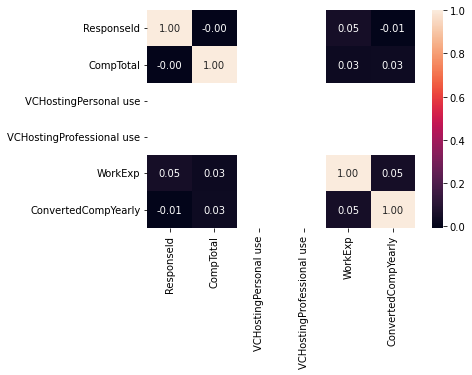

In [36]:
# We don't get much from this heatmap
sns.heatmap(df_2022.corr(), annot=True, fmt=".2f");

#### Prepare Data
* Wrangle and Clean  
Here I remove null/NaN values and I ensure the years of experience column has a suitable datatype by replacing string values and casting. I then look at the countries that have the highest sum of salary and the countries that have the most responses and I decide I am going to work with the latter because the list is more diverse.

In [37]:
# Remove any rows with null valuse for ResponseId ConvertedCompYearly, YearsCodePro, Country
study_df = df_2022.dropna(subset=['ResponseId', 'ConvertedCompYearly', 'YearsCodePro', 'Country'], axis=0)
study_df.shape[0]

37935

In [38]:
study_df.dtypes

ResponseId               int64
MainBranch              object
Employment              object
RemoteWork              object
CodingActivities        object
                        ...   
TrueFalse_2             object
TrueFalse_3             object
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
Length: 79, dtype: object

In [39]:
study_df['YearsCodePro'] = study_df['YearsCodePro'].replace('Less than 1 year', 0)
study_df['YearsCodePro'] = study_df['YearsCodePro'].replace('More than 50 years', 51)
study_df = study_df.astype({'YearsCodePro':'int'})

/var/folders/pz/h6v6tlgx0h55sh0774vn5c4c0000gp/T/ipykernel_19954/4133778293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_df['YearsCodePro'] = study_df['YearsCodePro'].replace('Less than 1 year', 0)
/var/folders/pz/h6v6tlgx0h55sh0774vn5c4c0000gp/T/ipykernel_19954/4133778293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_df['YearsCodePro'] = study_df['YearsCodePro'].replace('More than 50 years', 51)


In [40]:
#Remove values for YearsCodePro < 1 and YearsCodePro > 25
study_df = study_df[(study_df['YearsCodePro'] >= 1) & (study_df['YearsCodePro'] <= 25)]
study_df.shape[0]

34502

In [41]:
# Quick check of the values of YearCodePro
study_df['YearsCodePro'].value_counts(bins = 9, sort = False)

(0.975, 3.667]      7817
(3.667, 6.333]      8406
(6.333, 9.0]        5422
(9.0, 11.667]       3527
(11.667, 14.333]    2804
(14.333, 17.0]      2528
(17.0, 19.667]       852
(19.667, 22.333]    1920
(22.333, 25.0]      1226
Name: YearsCodePro, dtype: int64

In [42]:
# Shorten label that is too long
study_df = study_df.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')

In [43]:
# Get the top 10 countries with the max salary
top_10_sum = study_df.groupby('Country')['ConvertedCompYearly'].aggregate('sum')

top_10_sum.nlargest(n=10)

Country
United States of America    2.984943e+09
United Kingdom              4.612012e+08
Canada                      3.134281e+08
Germany                     3.131050e+08
Australia                   1.691468e+08
France                      1.192548e+08
Switzerland                 1.107339e+08
India                       1.067010e+08
Netherlands                 9.461862e+07
Spain                       9.456925e+07
Name: ConvertedCompYearly, dtype: float64

In [44]:
# Get the top 10 countries with the most responses --> This list looks more diverse
top_10_count = study_df['Country'].value_counts().nlargest(n=10)
top_10_count

United States of America    7565
Germany                     2714
United Kingdom              2350
India                       2011
Canada                      1337
France                      1286
Brazil                      1184
Poland                       919
Spain                        916
Netherlands                  819
Name: Country, dtype: int64

In [45]:
# Converto the top 10 countries with the most responses to a list 
top10_l = list(top_10_count.index)

In [46]:
# Keep only the data for the top 10 countries
study_df_top10 = study_df[study_df['Country'].isin(top10_l)]
study_df_top10.shape[0]

21101

#### Q2 - How does the country of residence relates to salary and years of experience?

* Analyse  
Here I take the data from the top 10 countries with the most responses and I calculate the median yearly salary (USD) grouped by country and by years of experience. I create another column that has the results for every response and I add it to the dataset I am working one.
* Visualise
I use a lineplot to plot the values of median yearly salary (USD), years of experience (between 1 and 25 years) by country. Then I use a scatterplot to add another dimension which is the count of responses for each year of experience. This is just to show that some countries (e.g. the USA) have much more responses than others (e.g. Neatherlands)
* Explain the visualisation  
In both graphs the countries that come on top of the graph show have the greatest median salary and the countries that are towards the bottom of the chart have the least. For example, higer payscales are recorded for the USA, Canada, and the UK compared to Brazil, India, Poland and Spain.

In [47]:
# Keep only the columns that we are interested in
study_df_top10 = study_df_top10[['ResponseId', 'Country', 'YearsCodePro', 'RemoteWork', 'ConvertedCompYearly']]
study_df_top10.head()

,ResponseId,Country,YearsCodePro,RemoteWork,ConvertedCompYearly
2,3,United Kingdom,5,"Hybrid (some remote, some in-person)",40205.0
8,9,Netherlands,6,"Hybrid (some remote, some in-person)",49056.0
10,11,United Kingdom,2,"Hybrid (some remote, some in-person)",60307.0
11,12,United States of America,10,Fully remote,194400.0
12,13,United States of America,5,"Hybrid (some remote, some in-person)",65000.0


In [48]:
# Find the median yearly salary (USD)
med = study_df_top10.groupby(['YearsCodePro','Country'])[['ConvertedCompYearly']].apply(np.median)
med.name = 'MEDIAN_ConvertedCompYearly'
med

YearsCodePro  Country                 
1             Brazil                       12468.0
              Canada                       54659.0
              France                       35192.0
              Germany                      49056.0
              India                         7740.0
                                            ...   
25            Netherlands                  74651.0
              Poland                       69372.0
              Spain                        53322.0
              United Kingdom               90460.0
              United States of America    168000.0
Name: MEDIAN_ConvertedCompYearly, Length: 250, dtype: float64

In [49]:
# Add the median yearly salary (USD) as a column in the dataset
study_df_top10 = study_df_top10.join(med, on=['YearsCodePro', 'Country'])
study_df_top10.head()

,ResponseId,Country,YearsCodePro,RemoteWork,ConvertedCompYearly,MEDIAN_ConvertedCompYearly
2,3,United Kingdom,5,"Hybrid (some remote, some in-person)",40205.0,72556.5
8,9,Netherlands,6,"Hybrid (some remote, some in-person)",49056.0,63360.0
10,11,United Kingdom,2,"Hybrid (some remote, some in-person)",60307.0,50256.0
11,12,United States of America,10,Fully remote,194400.0,155000.0
12,13,United States of America,5,"Hybrid (some remote, some in-person)",65000.0,129250.0


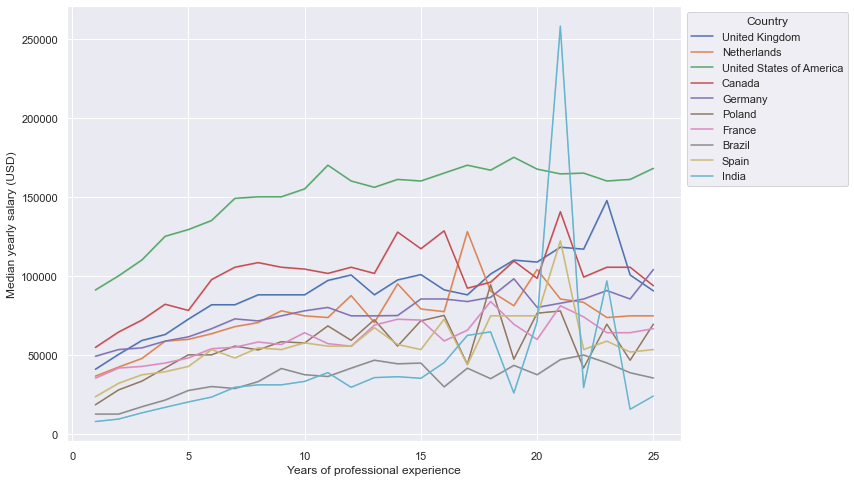

In [50]:
# Plot the results in a lineplot
sns.set(rc={'figure.figsize':(11, 8)})
ax = sns.lineplot(data = study_df_top10, x = study_df_top10['YearsCodePro'], y = study_df_top10['MEDIAN_ConvertedCompYearly'], hue = "Country")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Years of professional experience")
plt.ylabel("Median yearly salary (USD)")
plt.show()
figure = ax.get_figure()
figure.savefig("country_salary_line.png") 

In [51]:
# check how many rows are there for each YearsCodePro per Country
study_df_top10.groupby(["Country", "YearsCodePro"])["YearsCodePro"].count()

Country                   YearsCodePro
Brazil                    1                65
                          2                94
                          3               112
                          4               113
                          5               106
                                         ... 
United States of America  21               82
                          22              207
                          23              115
                          24              106
                          25              175
Name: YearsCodePro, Length: 250, dtype: int64

In [52]:
# Add a count of the 'size' of each calculation re: how many rows are there for each YearsCodePro per Country
# I got some help from here: https://stackoverflow.com/questions/29791785/python-pandas-add-a-column-to-my-dataframe-that-counts-a-variable
study_df_top10['count'] = study_df_top10.groupby(["Country", "YearsCodePro"])["YearsCodePro"].transform('count')
study_df_top10.head(10)

,ResponseId,Country,YearsCodePro,RemoteWork,ConvertedCompYearly,MEDIAN_ConvertedCompYearly,count
2,3,United Kingdom,5,"Hybrid (some remote, some in-person)",40205.0,72556.5,178
8,9,Netherlands,6,"Hybrid (some remote, some in-person)",49056.0,63360.0,57
10,11,United Kingdom,2,"Hybrid (some remote, some in-person)",60307.0,50256.0,154
11,12,United States of America,10,Fully remote,194400.0,155000.0,594
12,13,United States of America,5,"Hybrid (some remote, some in-person)",65000.0,129250.0,594
14,15,United States of America,5,Fully remote,110000.0,129250.0,594
22,23,Canada,20,Fully remote,97605.0,98386.0,50
25,26,Germany,9,"Hybrid (some remote, some in-person)",90647.0,74651.0,114
26,27,United States of America,5,"Hybrid (some remote, some in-person)",106960.0,129250.0,594
28,29,United States of America,14,"Hybrid (some remote, some in-person)",130000.0,161000.0,205


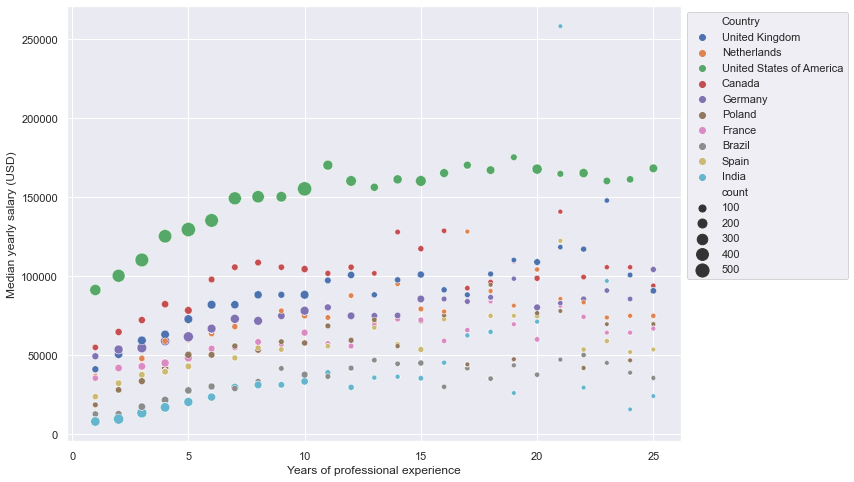

In [53]:
# This scatterplot has a fourth dimension for the size
sns.set(rc={'figure.figsize':(11, 8)})
ax = sns.scatterplot(data = study_df_top10, x = study_df_top10['YearsCodePro'], y = study_df_top10['MEDIAN_ConvertedCompYearly'], hue = 'Country', size = 'count', sizes=(20, 200))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Years of professional experience")
plt.ylabel("Median yearly salary (USD)")
plt.show()
figure = ax.get_figure()
figure.savefig("country_salary_scatter.png") 

In [54]:
# Comparing avg values
study_df_top10.groupby('Country').mean()['YearsCodePro'].sort_values()

Country
India                       5.758329
Poland                      7.833515
France                      8.104199
Brazil                      8.450169
Germany                     8.900516
Spain                       9.033843
Netherlands                 9.266178
Canada                      9.380703
United Kingdom              9.537447
United States of America    9.717515
Name: YearsCodePro, dtype: float64

In [55]:
# Comparing avg values
study_df_top10.groupby('Country').mean()['ConvertedCompYearly'].sort_values().round()

Country
Brazil                       48244.0
India                        53059.0
Poland                       65822.0
France                       92733.0
Spain                       103242.0
Germany                     115367.0
Netherlands                 115529.0
United Kingdom              196256.0
Canada                      234426.0
United States of America    394573.0
Name: ConvertedCompYearly, dtype: float64

#### Q3 - What are the conditions around flexible working in these countries (with the most responses)?

#### Data Understanding
* Access and Explore
Here I look into the questions that are related with remote work and what values to expect.

In [56]:
# Check the survey question about RemoteWork
get_description('RemoteWork', schema_2022)

['Which best describes your current work situation?']

In [57]:
# Check the values for RemoteWork
df_2022['RemoteWork'].value_counts()

Fully remote                            25341
Hybrid (some remote, some in-person)    25021
Full in-person                           8596
Name: RemoteWork, dtype: int64

In [58]:
df_remote = df_2022[['ResponseId','Country', 'RemoteWork', 'ConvertedCompYearly', 'YearsCodePro']]
df_remote.head()

,ResponseId,Country,RemoteWork,ConvertedCompYearly,YearsCodePro
0,1,NaN,NaN,NaN,NaN
1,2,Canada,Fully remote,NaN,NaN
2,3,United Kingdom of Great Britain and Northern I...,"Hybrid (some remote, some in-person)",40205.0,5
3,4,Israel,Fully remote,215232.0,17
4,5,United States of America,"Hybrid (some remote, some in-person)",NaN,3


#### Prepare Data
* Wrangle and Clean  
Here I remove null/NaN values and I ensure the country values are not too big to plot. 
I then select the countries that have the most responses because I want to use the same list of countries that I used in the previous question.

In [59]:
# Shorten label that is too long
df_remote = df_remote.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')

In [60]:
# Remove rows with any null values in the selected columns
df_remote = df_remote.dropna(subset=['ResponseId','Country','RemoteWork'], axis=0, how = 'any')
df_remote.head(10)

,ResponseId,Country,RemoteWork,ConvertedCompYearly,YearsCodePro
1,2,Canada,Fully remote,NaN,NaN
2,3,United Kingdom,"Hybrid (some remote, some in-person)",40205.0,5
3,4,Israel,Fully remote,215232.0,17
4,5,United States of America,"Hybrid (some remote, some in-person)",NaN,3
8,9,Netherlands,"Hybrid (some remote, some in-person)",49056.0,6
9,10,Croatia,Fully remote,NaN,30
10,11,United Kingdom,"Hybrid (some remote, some in-person)",60307.0,2
11,12,United States of America,Fully remote,194400.0,10
12,13,United States of America,"Hybrid (some remote, some in-person)",65000.0,5
13,14,Australia,Fully remote,NaN,15


In [61]:
# Use the same top 10 countries as before
df_remote_top10 = df_remote[df_remote['Country'].isin(top10_l)]
df_remote_top10.head(10)

,ResponseId,Country,RemoteWork,ConvertedCompYearly,YearsCodePro
1,2,Canada,Fully remote,NaN,NaN
2,3,United Kingdom,"Hybrid (some remote, some in-person)",40205.0,5
4,5,United States of America,"Hybrid (some remote, some in-person)",NaN,3
8,9,Netherlands,"Hybrid (some remote, some in-person)",49056.0,6
10,11,United Kingdom,"Hybrid (some remote, some in-person)",60307.0,2
11,12,United States of America,Fully remote,194400.0,10
12,13,United States of America,"Hybrid (some remote, some in-person)",65000.0,5
14,15,United States of America,Fully remote,110000.0,5
22,23,Canada,Fully remote,97605.0,20
23,24,Netherlands,"Hybrid (some remote, some in-person)",NaN,6


#### Question 3 - What are the conditions around flexible working in these countries?

* Analyse  
Here I take the data from the top 10 countries with the most responses and I calculate the percentage that each country has for each type of remote work (Fully remote, Hybrid and Full in-person).
* Visualise  
Initially I use a barplot to plot the count for each of the remote work options per country. I didn't find that graph very insightful and so I used the percentage that I calculated to plot the results in a stacked barplot with labels on the bars that indicate the percentage for each type of remote work by country. 
* Explain the visualisation  
The first graph that shows the count exposes that some countries much more responses than others, but this is not something I want to focus so using a stacked percentage barplot makes the comparison between the countries much easier. As you can see  Canada, Poland and the UK have the smallest percentage of fully in-person work, whilst India has the largest percentage.

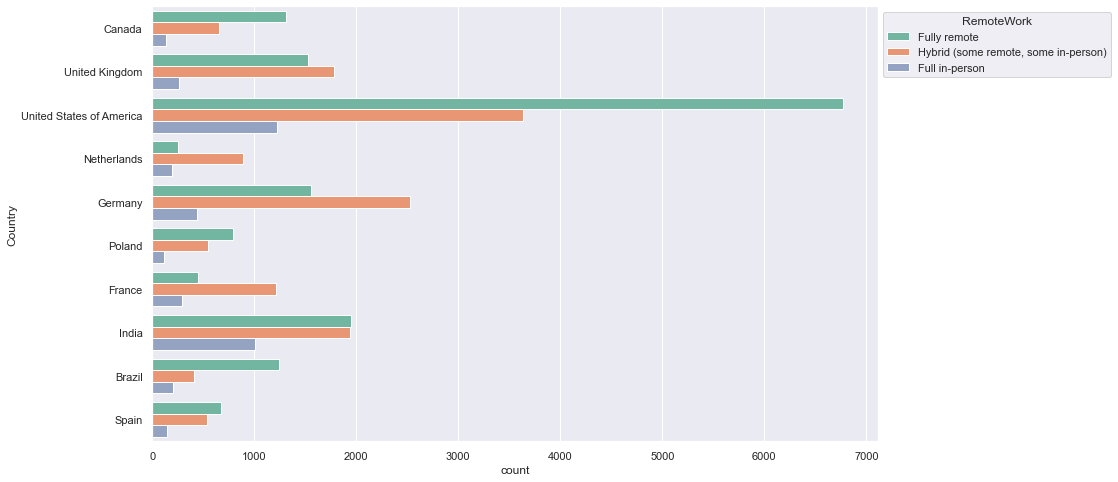

In [62]:
# Show the results in a histogram
sns.set(rc={'figure.figsize':(13, 8)})
ax = sns.countplot(data=df_remote_top10, y=df_remote_top10['Country'], hue=df_remote_top10['RemoteWork'], palette=sns.color_palette("Set2") )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
figure = ax.get_figure()
figure.savefig("country_salary_scatter.png") 

In [63]:
# Check the count for the top10 countries
df_remote_top10.groupby(["Country", "RemoteWork"])["RemoteWork"].count()

Country                   RemoteWork                          
Brazil                    Full in-person                           207
                          Fully remote                            1248
                          Hybrid (some remote, some in-person)     414
Canada                    Full in-person                           136
                          Fully remote                            1308
                          Hybrid (some remote, some in-person)     652
France                    Full in-person                           289
                          Fully remote                             450
                          Hybrid (some remote, some in-person)    1215
Germany                   Full in-person                           443
                          Fully remote                            1558
                          Hybrid (some remote, some in-person)    2529
India                     Full in-person                          1005
              

In [66]:
#Get the total count for each of the countries
df_remote_top10.groupby(['Country'])['RemoteWork'].count()

Country
Brazil                       1869
Canada                       2096
France                       1954
Germany                      4530
India                        4899
Netherlands                  1334
Poland                       1452
Spain                        1353
United Kingdom               3575
United States of America    11629
Name: RemoteWork, dtype: int64

In [65]:
#
df_remote_top10_grouped = df_remote_top10.groupby(["Country", "RemoteWork"])["RemoteWork"].count() / df_remote_top10.groupby(['Country'])['RemoteWork'].count()
df_remote_top10_grouped

Country                   RemoteWork                          
Brazil                    Full in-person                          0.110754
                          Fully remote                            0.667737
                          Hybrid (some remote, some in-person)    0.221509
Canada                    Full in-person                          0.064885
                          Fully remote                            0.624046
                          Hybrid (some remote, some in-person)    0.311069
France                    Full in-person                          0.147902
                          Fully remote                            0.230297
                          Hybrid (some remote, some in-person)    0.621801
Germany                   Full in-person                          0.097792
                          Fully remote                            0.343929
                          Hybrid (some remote, some in-person)    0.558278
India                     Full in-per

In [223]:
df_remote_top10_grouped = df_remote_top10_grouped.unstack(level='RemoteWork')
df_remote_top10_grouped

RemoteWork,Full in-person,Fully remote,"Hybrid (some remote, some in-person)"
Country,,,
Brazil,0.110754,0.667737,0.221509
Canada,0.064885,0.624046,0.311069
France,0.147902,0.230297,0.621801
Germany,0.097792,0.343929,0.558278
India,0.205144,0.398449,0.396407
Netherlands,0.143178,0.187406,0.669415
Poland,0.079201,0.546143,0.374656
Spain,0.106430,0.498152,0.395418
United Kingdom,0.072448,0.428531,0.499021


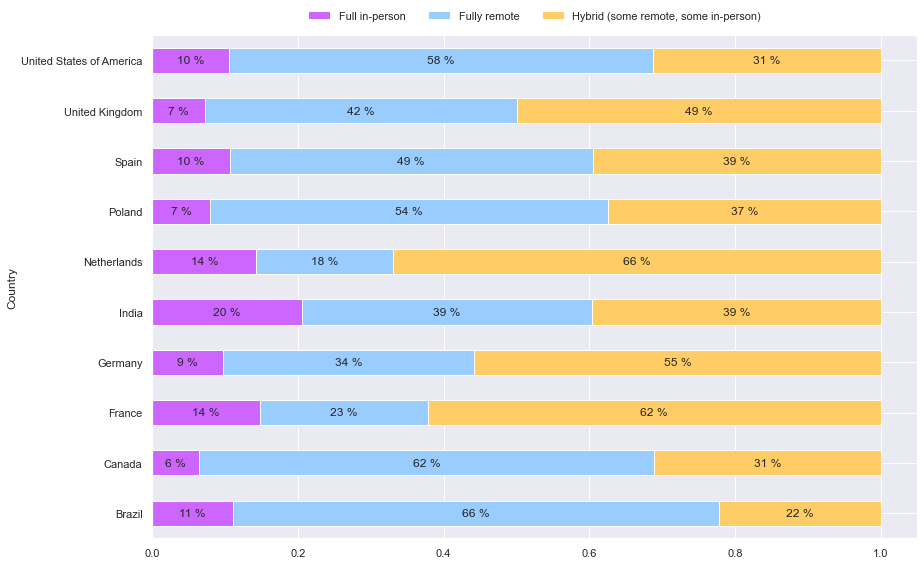

In [229]:
# Plotting the percentages. I got help from here: https://stackoverflow.com/questions/64754905/100-stacked-bar-chart-python-seaborn-matplotlib
df_remote_top10_grouped.plot.barh(stacked=True, color = {"Full in-person": "#cc66ff", "Fully remote": "#99ccff", "Hybrid (some remote, some in-person)":"#ffcc66" })
plt.legend(bbox_to_anchor=(0.5, 1.02), loc="lower center", borderaxespad=0, frameon=False, ncol=3)
for ix, row in df_remote_top10_grouped.reset_index(drop=True).iterrows():
    #print(ix, row)
    cumulative = 0
    for element in row:
        plt.text(cumulative + element / 2,ix,f"{int(element * 100)} %",va="center",ha="center",)
        cumulative += element
plt.tight_layout()

#### Evaluation
* Findings  
    * Q1 - Javascript, HTML/CSS and SQL are the top three languages used overall. Bash/Shell, SQL, Delphi and C# are more popular with the ‘15 and over’ developers, while the ‘less than 15’ years group shows preference for Python, HTML/CSS and JavaScript.  
    * Q2 - The country of residence has a significant impact on the salary that professionals with the same years of experience earn. Higer payscales are recorded for the USA, Canada, and the UK compared to Brazil, India, Poland and Spain.  
    * Q3 - Working fully remotely or hybird (some remote, some in-person) is the dominant working pattern recorded for all of the countries. For 2022 Canada, Poland and the UK have the smallest percentage of fully in-person work, whilst India has the largest percentage.  

**This code was used to test how I calculate the median salary per country**

In [230]:
# Used this to test the process of grouping the salary by country
df_test = pd.DataFrame({'Bin_Years': ['1-3', '4-6','4-6','4-6','7-9','7-9','10-12','10-12','10-12','10-12'], 
                   'Country' : ['Uruguay','Albania','Albania','Yemen','Venezuela','Albania','Italy','Italy','Italy','France'],
                   'Salary' : [2,3,4,5,4,2,5,3,8,7]})
df_test

,Bin_Years,Country,Salary
0,1-3,Uruguay,2
1,4-6,Albania,3
2,4-6,Albania,4
3,4-6,Yemen,5
4,7-9,Venezuela,4
5,7-9,Albania,2
6,10-12,Italy,5
7,10-12,Italy,3
8,10-12,Italy,8
9,10-12,France,7


In [697]:
m = df_test.groupby(['Bin_Years','Country'])[['Salary']].apply(np.median)
m.name = 'MEDIAN_Salary'
m

Bin_Years  Country  
1-3        Uruguay      2.0
10-12      France       7.0
           Italy        5.0
4-6        Albania      3.5
           Yemen        5.0
7-9        Albania      2.0
           Venezuela    4.0
Name: MEDIAN_Salary, dtype: float64

In [698]:
df_test = df_test.join(m, on=['Bin_Years', 'Country'])

In [700]:
df_test

,Bin_Years,Country,Salary,MEDIAN_Salary
0,1-3,Uruguay,2,2.0
1,4-6,Albania,3,3.5
2,4-6,Albania,4,3.5
3,4-6,Yemen,5,5.0
4,7-9,Venezuela,4,4.0
5,7-9,Albania,2,2.0
6,10-12,Italy,5,5.0
7,10-12,Italy,3,5.0
8,10-12,Italy,8,5.0
9,10-12,France,7,7.0
